In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline


In [1]:
words = open('names.txt','r').read().splitlines()
words[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

# create training dataset

In [5]:
# we are wasting some space as one row and one column is completely 0
# we don't need to use both start and end tokens, we will use just one '.' 

N = torch.zeros((27,27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']= 0
itos = {i:s for s,i in stoi.items()}

In [8]:
xs,ys =[],[]

for w in words[:1]: # taken only one word
    chs = ['.']+list(w)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1, ix2 = stoi[ch1],stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs) #torch.Tensor(), capital T is different, torch.Tensor() return dtype as float32, lowercase infers the datatype (int in this case)
ys = torch.tensor(ys)# recommended to always use torch.tensor and not torch.Tensor


In [9]:
xs

tensor([ 0,  5, 13, 13,  1])

In [10]:
ys # for input 0, output is 5, for input 5 output is 13 and so on

tensor([ 5, 13, 13,  1,  0])

In [17]:
# since we have a single integer as an example, we need to encode them - using one hot encoding
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() # now these vectors can be put in the NN, we want dtype to be float and not int
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
xenc.shape

(torch.Size([5, 27]),)

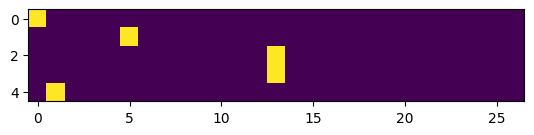

In [19]:
plt.imshow(xenc)

In [29]:
W = torch.randn((27,27))
print(W.shape)
W

torch.Size([27, 27])


tensor([[ 4.3458e-02,  1.6452e+00,  1.7143e+00, -1.6903e+00,  1.0903e+00,
         -4.4693e-01,  9.3233e-01,  1.0034e+00, -4.9965e-01, -9.8683e-01,
          6.6400e-01,  8.1470e-01, -1.4223e+00, -1.4988e+00, -1.7541e+00,
         -3.1863e-01,  2.9994e-01, -7.1740e-01, -3.1648e-01,  3.2639e-01,
         -1.1404e+00,  6.6917e-01,  1.1645e+00, -3.7464e-01,  2.7272e-01,
         -3.3692e-01, -7.2400e-01],
        [-4.3819e-01,  1.9125e+00,  1.4317e+00,  1.4990e+00,  2.0811e+00,
          1.7368e-01, -1.9796e-01, -7.9720e-01, -8.1439e-01,  2.2169e-01,
          1.6824e+00, -7.5749e-01, -2.8739e-01,  1.9046e+00, -3.2517e-01,
         -1.6542e+00, -9.5115e-02,  1.0136e+00, -3.9064e-01,  1.7885e+00,
          4.0772e-01,  2.1609e+00,  3.0456e-02, -1.3655e-01,  1.6446e+00,
          1.3668e+00, -4.5439e-02],
        [-1.5792e-02,  1.8244e+00, -6.4208e-01, -1.2195e+00, -4.9707e-01,
          9.6834e-01,  1.5457e-01,  2.6740e+00,  2.0278e+00, -2.2920e+00,
          2.3528e-01, -2.7620e+00, -1.87

In [30]:
xenc.shape, W.shape # multiplying these two will return 5X1 tensor

(torch.Size([5, 27]), torch.Size([27, 27]))

In [31]:
xenc @ W # dot product of xenc and W

tensor([[ 0.0435,  1.6452,  1.7143, -1.6903,  1.0903, -0.4469,  0.9323,  1.0034,
         -0.4997, -0.9868,  0.6640,  0.8147, -1.4223, -1.4988, -1.7541, -0.3186,
          0.2999, -0.7174, -0.3165,  0.3264, -1.1404,  0.6692,  1.1645, -0.3746,
          0.2727, -0.3369, -0.7240],
        [ 0.4712,  0.0543, -0.7491, -1.2211, -1.2639, -0.8613,  1.7420, -0.7653,
         -0.4790,  0.5829, -0.4873,  1.1558, -0.4667,  0.4164,  1.9125,  0.2894,
          0.4404,  0.8723,  0.1624, -0.9107, -1.0327,  1.4922, -1.1040,  0.0257,
          1.3004,  1.7106, -0.5052],
        [ 1.5446, -0.2767, -0.4910, -0.2580,  1.9286,  0.8160, -1.3986,  0.6602,
          2.5341,  0.2218,  0.9647, -0.6299,  0.0506,  0.3336,  0.5220, -1.7737,
         -1.0262, -2.0984, -0.7666, -0.9958, -1.0026, -0.3518, -0.3940,  0.1500,
          1.0975,  0.4138, -1.5800],
        [ 1.5446, -0.2767, -0.4910, -0.2580,  1.9286,  0.8160, -1.3986,  0.6602,
          2.5341,  0.2218,  0.9647, -0.6299,  0.0506,  0.3336,  0.5220, -1.7737

In [32]:
(xenc @ W)[3,13] # this gives the firing rate of the 13th neuron when 3rd example is the input
# this was achieved by a dot product between the 3rd input and the 13th column of the W matrix

tensor(0.3336)

In [33]:
# aboeve is equivalent to
(xenc[3]*W[:,13]).sum() # but pytorch does it parallely and efficiently using the above process for a batch

tensor(0.3336)

In [49]:
# randomly initialise 27 neurons' weights. each neuron receives 27 inputs
# using a generator just so if anyone uses the code, they get same W initilisation

# initialising weights
g= torch.Generator().manual_seed(42)
W = torch.randn((27,27),generator=g) 

#forward pass
# encoding inputs
xenc = F.one_hot(xs, num_classes=27).float() # now these vectors can be put in the NN, we want dtype to be float and not int

logits = xenc @ W # predict log counts

# applying softmax to output the probability distributions
counts = logits.exp() # equilvalent to N used in previous notebook
probs = counts/counts.sum(1,keepdim=True)

In [47]:
prob[0].sum() == 1, probs.shape

(tensor(True), torch.Size([5, 27]))

In [57]:
# probs will be the output, gives the probability of each char being next char
# we want to optimise W to get correct probs(measure by loss function)
nlls = torch.zeros(5) # negative log likelihood
for i in range(5):
    #ith bigram
    x = xs[i].item() # input char index
    y = ys[i].item() # output/label char index
    print('----------------------------------------------------------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:',x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i,y]
    print('probability assigned by the the net tothe correct char:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = - logp
    print('Negative log likelihood:', nll.item())
    nlls[i]=nll
print('=========')
print('average negative log likelihood or loss = ', nlls.mean().item())

----------------------------------------------------------------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.1230, 0.0793, 0.0441, 0.0022, 0.0353, 0.0052, 0.0172, 0.0036, 0.0084,
        0.0932, 0.0121, 0.0044, 0.0087, 0.0102, 0.0083, 0.0384, 0.0926, 0.0153,
        0.0109, 0.0278, 0.0084, 0.0527, 0.0399, 0.0962, 0.0644, 0.0655, 0.0330])
label (actual next character): 5
probability assigned by the the net tothe correct char: 0.005211981013417244
log likelihood: -5.256795406341553
Negative log likelihood: 5.256795406341553
----------------------------------------------------------------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0396, 0.0698, 0.0227, 0.0037, 0.0562, 0.0153, 0.0626, 0.0112, 0.0421,
        0.0084, 0.0581, 0.1125, 0.0951, 0.0292, 0.0181, 0.0107, 0.0247, 0.0316,
        0.0586, 0.0140, 0.1109, 0.0019, 0.0147, 0.0067, 0.0502, 0.0033, 

### OPTIMISATION

In [99]:
# using complete dataset

xs,ys =[],[]
for w in words:
    chs = ['.']+list(w)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1, ix2 = stoi[ch1],stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs) #torch.Tensor(), capital T is different, torch.Tensor() return dtype as float32, lowercase infers the datatype (int in this case)
ys = torch.tensor(ys)# recommended to always use torch.tensor and not torch.Tensor
num= xs.nelement()
print(num) # we are working with these many examples

228146


In [100]:
# initialising weights
g= torch.Generator().manual_seed(42)
W = torch.randn((27,27),generator=g,requires_grad=True) 


In [101]:
# regularization - equivalent to model smoothing
# alpha * (W**2).mean(), we can add this term to the loss

In [102]:
# since we only have one parameter,W we dont need to call .parameters method and loop over it
lr = 100 # we are using a very large learning rate
epochs = 100 
for epoch in range(epochs):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # now these vectors can be put in the NN, we want dtype to be float and not int
    logits = xenc @ W # predict log counts
    # applying softmax to output the probability distributions
    counts = logits.exp() # equilvalent to N used in previous notebook
    probs = counts/counts.sum(1,keepdim=True)
    loss  = - probs[torch.arange(num),ys].log().mean() + 0.01 * (W**2).mean() # second term is regularization, it tries to penalise large W and tries to get it towards 0
    print(f'loss after epoch {epoch} : {loss}')
    # backward pass
    W.grad = None # a way to set gradients to zero
    loss.backward()
    
    #update params
    W.data += -lr * W.grad

loss after epoch 0 : 3.7064766883850098
loss after epoch 1 : 3.149928331375122
loss after epoch 2 : 2.9258015155792236
loss after epoch 3 : 2.7928905487060547
loss after epoch 4 : 2.7342138290405273
loss after epoch 5 : 2.685577154159546
loss after epoch 6 : 2.675067663192749
loss after epoch 7 : 2.6397056579589844
loss after epoch 8 : 2.6286978721618652
loss after epoch 9 : 2.608739137649536
loss after epoch 10 : 2.610383987426758
loss after epoch 11 : 2.5883595943450928
loss after epoch 12 : 2.5871224403381348
loss after epoch 13 : 2.57504940032959
loss after epoch 14 : 2.581500291824341
loss after epoch 15 : 2.5633888244628906
loss after epoch 16 : 2.565204381942749
loss after epoch 17 : 2.556692600250244
loss after epoch 18 : 2.565431594848633
loss after epoch 19 : 2.5485620498657227
loss after epoch 20 : 2.5514988899230957
loss after epoch 21 : 2.545212745666504
loss after epoch 22 : 2.5555033683776855
loss after epoch 23 : 2.5388410091400146
loss after epoch 24 : 2.54209017753601

In [93]:
print(loss.item())

2.50962495803833


### Inference, sampling from neural net model

In [98]:
g = torch.Generator().manual_seed(43)
for i in range(20):
    out =[]
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log counts
        counts = logits.exp() # counts, equivalent to N
        p = counts/counts.sum(1, keepdim=True) # probabilities for next character
        
        ix = torch.multinomial(p, num_samples=1,replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

ren.
roinyaclynenelaza.
jerekobaien.
kiah.
kosa.
paf.
jerinirumuaydowon.
jea.
mber.
r.
zorl.
siliopxalon.
wrifma.
caciowelen.
yn.
mi.
ly.
n.
sik.
pera.


In [ ]:
# we used a single linear layer to create the neural net, we didnt use any bias term
# ideally this can get as good as the bigram model implemented using counts, it cant surpass that
# coz we counted the actual probabilities there and here we tried to arrive at those probs by optimising the weights

# cons we only took one previous character as context- so it doesnt give good predictions
# next we will look to look at chars before and after for context maybe